In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
quality = df["quality"].values

#classifying the quality of the wine
classification = []

for i in quality:
    if i < 5:
        classification.append("bad")
    elif i >= 5 and i < 6:
        classification.append("average")
    else:
        classification.append("flawless")

In [12]:
classification = pd.DataFrame(data=classification,columns=["quality_type"])
df = pd.concat([df,classification],axis=1)

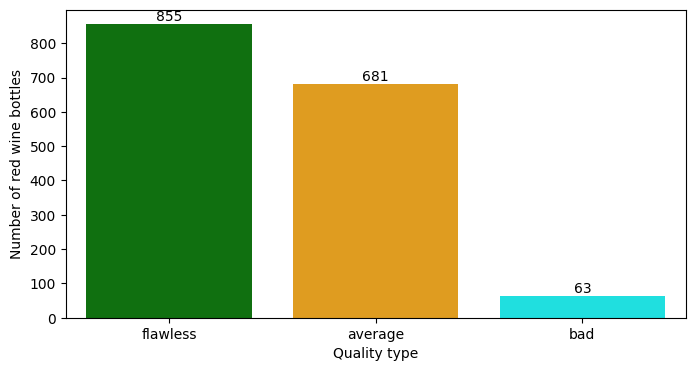

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'quality_type' in df.columns:
    plt.figure(figsize=(8, 4))
    plt.rcParams.update({'font.size': 10})

    category_counts = df["quality_type"].value_counts()
    colors = ["green", "orange", "cyan"]

    sns.barplot(x=category_counts.index, y=category_counts, palette=colors)

    # Adding labels to the bars
    for i, count in enumerate(category_counts):
        plt.text(i, count + 10, str(count), ha='center')

    # Adding labels to the x-axis and y-axis
    plt.xlabel("Quality type")
    plt.ylabel("Number of red wine bottles")
    plt.show()
else:
    print("'category' column not found in the DataFrame.")

In [16]:
X = df.drop("quality_type", axis=1)  # Features
y = df["quality_type"] #class

In [19]:
from sklearn.preprocessing import LabelEncoder

a = LabelEncoder()
y = a.fit_transform(y)
y

array([0, 0, 0, ..., 2, 0, 2], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification)
print(f"\nQuality of Red Wine (accuracy score): {accuracy * 100:.2f}%")

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


Quality of Red Wine (accuracy score): 100.00%


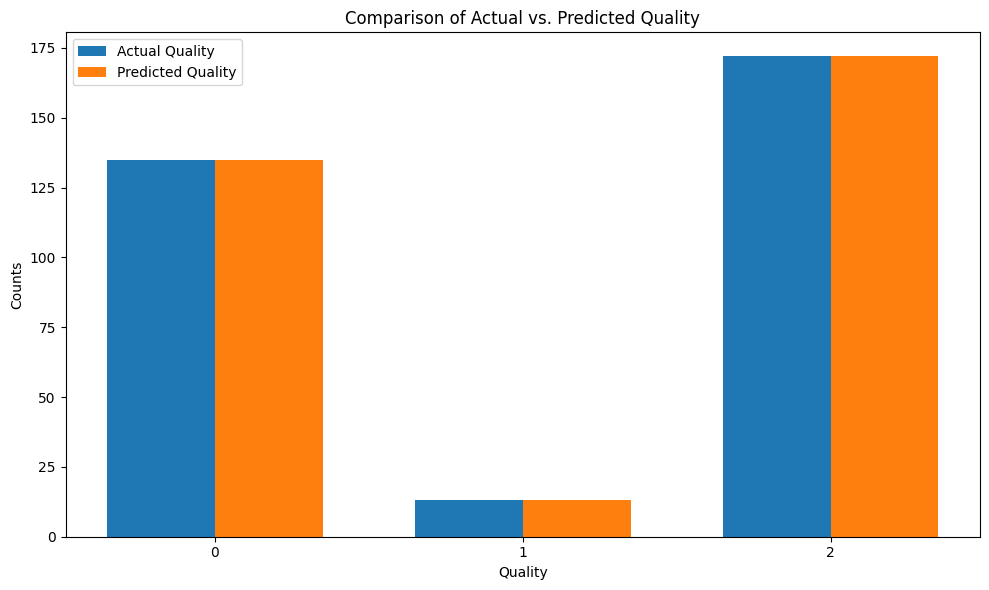

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test contains actual quality values and y_pred contains predicted quality values

# Get unique quality values
unique_quality_values = np.unique(np.concatenate((y_test, y_pred)))

# Count the occurrences of each quality value in actual and predicted
actual_counts = np.array([np.sum(y_test == q) for q in unique_quality_values])
predicted_counts = np.array([np.sum(y_pred == q) for q in unique_quality_values])

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
index = np.arange(len(unique_quality_values))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, actual_counts, bar_width, label='Actual Quality')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted Quality')

# Label the x-axis with quality values
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.title('Comparison of Actual vs. Predicted Quality')
plt.xticks(index + bar_width / 2, unique_quality_values)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()